In [1]:
import matplotlib.pyplot as plt
import mplhep
import numpy as np
import pandas as pd
import scipy.optimize as sc
import scipy

In [4]:
slit_widths = [50, 100, 150, 200, 250, 300]
data = {}

for element in slit_widths:
    file = 'Mono/Hg_546_slit_' + str(element) + '.dig'

    df = pd.read_csv(file, skiprows=1, skipfooter=0, sep='\t', names=['Channel', 'Counts'], decimal=',')
    data[str(element)] = {}
    data[str(element)]['Channel'] = df['Channel']
    data[str(element)]['Counts'] = df['Counts']

In [26]:
def lorentz(x, A, w0, gamma):
    '''Function of a Lorentz-curve.

    w0 : position of maximum
    gamma : curve width
    '''
    return A/((x**2 - w0**2)**2 + gamma**2 * w0**2)


def voigt(x, A, mean, sigma, gamma, C):
    return A * scipy.special.voigt_profile(x-mean, sigma, gamma) + C

def gauss(x, A, mu, sigma, C):
    return A * np.exp(-(x-mu)**2 / (2*sigma)) + C

[1.85970868e+04 5.45748608e+03 3.69787186e-01 6.55699026e+01]
[4.46919140e+04 5.45650822e+03 9.55019681e-01 2.29811286e+02]
[7.59417108e+04 5.45706510e+03 1.92982250e+00 4.21694031e+02]
[9.70012147e+04 5.45760243e+03 3.29503913e+00 3.93509548e+02]
[ 1.17136165e+05  5.45737061e+03  5.63608999e+00 -8.08112999e+02]
[ 1.21860226e+05  5.45680928e+03  8.63112346e+00 -2.46724300e+03]


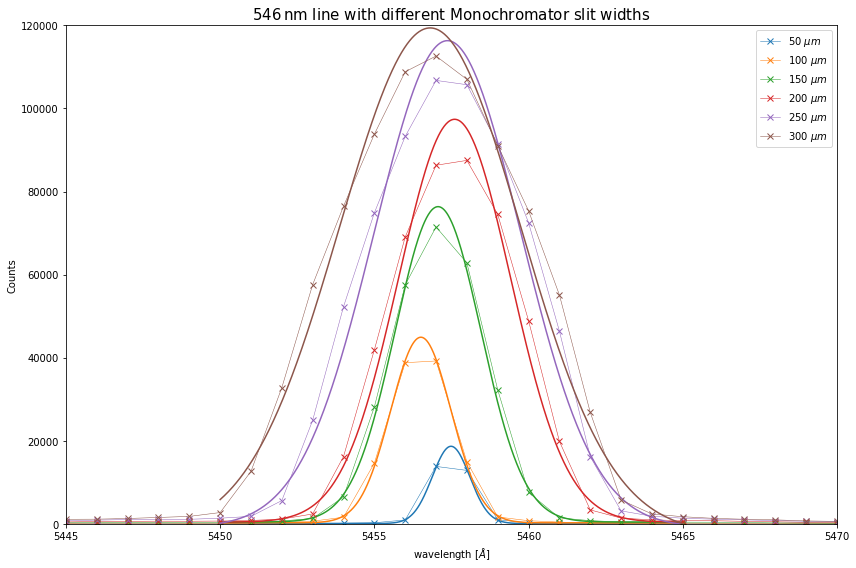

In [37]:
fig, ax = plt.subplots(figsize = (12,8))
xaxis = np.linspace(5450, 5465, 1001)
colors = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5']

sigmas = np.zeros(6)
As = np.zeros(6)
mus = np.zeros(6)

ax.set_xlim([5445, 5470])
ax.set_ylim([0,120000])

i=0
for element in slit_widths:
    fitx = data[str(element)]['Channel'][30:45]
    fity = data[str(element)]['Counts'][30:45]
    params, cov = sc.curve_fit(gauss, fitx, fity,
                               sigma=np.sqrt(fity), absolute_sigma=True, p0=[1e6, 5456, 20, 0])
    As[i] = params[0]
    sigmas[i] = params[2]
    mus[i] = params[1]

    ax.plot(data[str(element)]['Channel'] ,data[str(element)]['Counts'], marker = 'x', lw = 0.5, color=colors[i],
           label = f'{slit_widths[i]} $\mu m$')
    ax.plot(xaxis, gauss(xaxis, *params))
    print(params)
    i+=1
ax.legend()
ax.set_xlabel(r'wavelength [$\AA$]')
ax.set_ylabel(r'Counts')
ax.set_title(r'$546\,$nm line with different Monochromator slit widths', size='15')
plt.tight_layout()
plt.show()

In [39]:
print(np.mean(mus))
print(np.std(mus))

5457.140285482566
0.3874975626540971


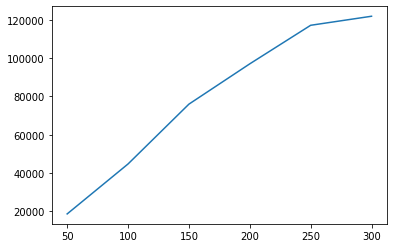

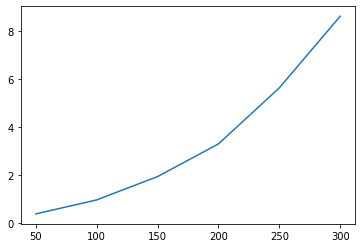

In [23]:
plt.plot(slit_widths, As)
plt.show()
plt.plot(slit_widths, sigmas)
plt.show()